![lambo](https://www.teahub.io/photos/full/37-372221_images-cool-cars-new-car-models-2019-lamborghini.jpg)

# **"They're driving right by, they don't even know what they're missing."**

# **INFORMATION ABOUT DATA**

**Mark:** Brand of car. (string)

**Model:** Model of car. (string)

**Year:** Manufacture date of the car. (int)

**Mileage:** The distance traveled by the car in miles.

**Vol Engine:** Engine volume of car. The high price affects the price positively. (int)

**Fuel:** Fuel type of the car. (string)

**City:** City where the car was sold. (string)

**Province:** Province where the car was sold. (string)

**Price:** Selling price of the car.(int) **(TARGET)**

# **IMPORTING LIBRARIES AND INFORMATIONS ABOUT DATA**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings # We don't see any error of version
warnings.filterwarnings("ignore")

we know some data types. We set the data types of this data to be the smallest to use less RAM.

int8 = 0-127 bit

uint16 = (-32768)-32767

uint32 = (–2147483648)-2147483647

In [2]:
dtypes = {
        'year'          : 'int16',
        'mileage'       : 'uint16',
        'vol_engine'    : 'uint16',
        'price'         : 'uint32',
        }
df = pd.read_csv("Car_Prices_Poland.csv", dtype = dtypes).drop(columns=["Unnamed: 0" ,"generation_name" ])

In [3]:
df.shape # Looking at data shape

(117927, 9)

In [4]:
df.head() # Looking at data's first 5 row 

,mark,model,year,mileage,vol_engine,fuel,city,province,price
0,opel,combo,2015,8496,1248,Diesel,Janki,Mazowieckie,35900
1,opel,combo,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,opel,combo,2015,16293,1598,Diesel,Brzeg,Opolskie,27000
3,opel,combo,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,opel,combo,2014,37464,1400,CNG,Tarnowskie Góry,Śląskie,35900


In [5]:
df.info() # Getting information about data. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117927 entries, 0 to 117926
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   mark        117927 non-null  object
 1   model       117927 non-null  object
 2   year        117927 non-null  int16 
 3   mileage     117927 non-null  uint16
 4   vol_engine  117927 non-null  uint16
 5   fuel        117927 non-null  object
 6   city        117927 non-null  object
 7   province    117927 non-null  object
 8   price       117927 non-null  uint32
dtypes: int16(1), object(5), uint16(2), uint32(1)
memory usage: 5.6+ MB


In [6]:
df.isnull().sum() # we don't have any null values

mark          0
model         0
year          0
mileage       0
vol_engine    0
fuel          0
city          0
province      0
price         0
dtype: int64

# **Data Visualization**

In [7]:
categorical = df.columns[df.dtypes == "object"]
numerical = df.columns[df.dtypes != "object"]

In [8]:
df.corr().style.background_gradient(cmap='coolwarm')

,year,mileage,vol_engine,price
year,1.000000,-0.269228,-0.161557,0.596181
mileage,-0.269228,1.000000,0.048627,-0.275007
vol_engine,-0.161557,0.048627,1.000000,0.299669
price,0.596181,-0.275007,0.299669,1.000000


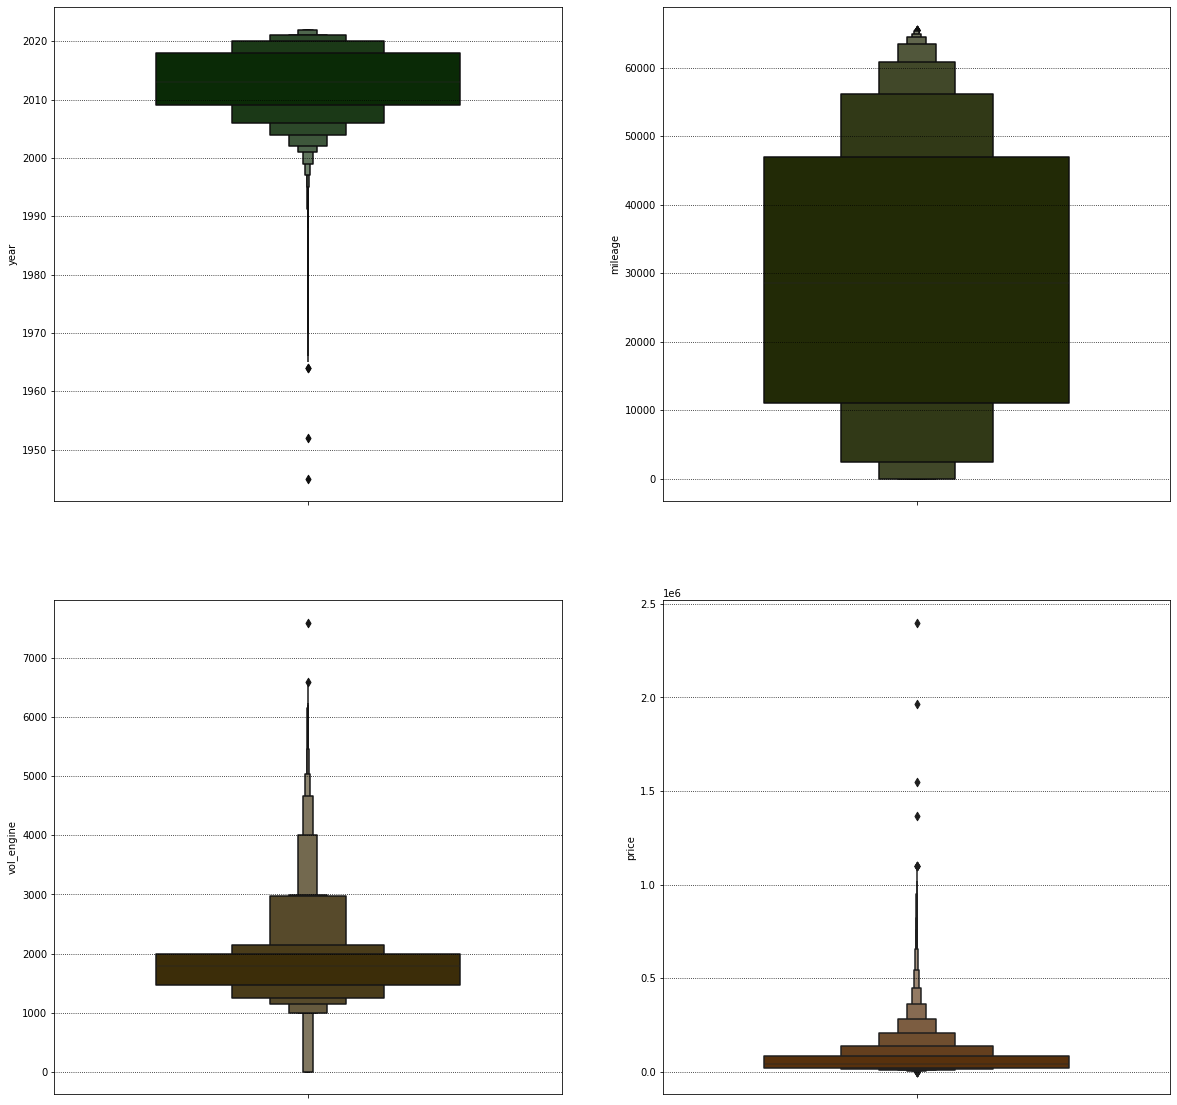

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(20,20))

gr = fig.add_gridspec(2,2)

ax0 = fig.add_subplot(gr[0,0])
ax1 = fig.add_subplot(gr[0,1])
ax2 = fig.add_subplot(gr[1,0])
ax3 = fig.add_subplot(gr[1,1])
axxes = [ax0,ax1,ax2,ax3]

for i in range(0,len(numerical)):
    axxes[i].grid(color='#000000', linestyle=':', axis='y')
    sns.boxenplot(ax=axxes[i],y=df[numerical[i]],palette=["#"+str(i*2)+"53000"],width=0.6)

# Numerical values is looking good. We don't touch them.

In [10]:
_ = [print(i,"= ",len(df[i].unique())) for i in categorical]; # how many of the categorical data are unique

mark =  23
model =  328
fuel =  6
city =  4427
province =  23


In [11]:
n_cat = ["mark","fuel","province"] # We visualize some data. We don't visualize "model and city" because has too many unique values

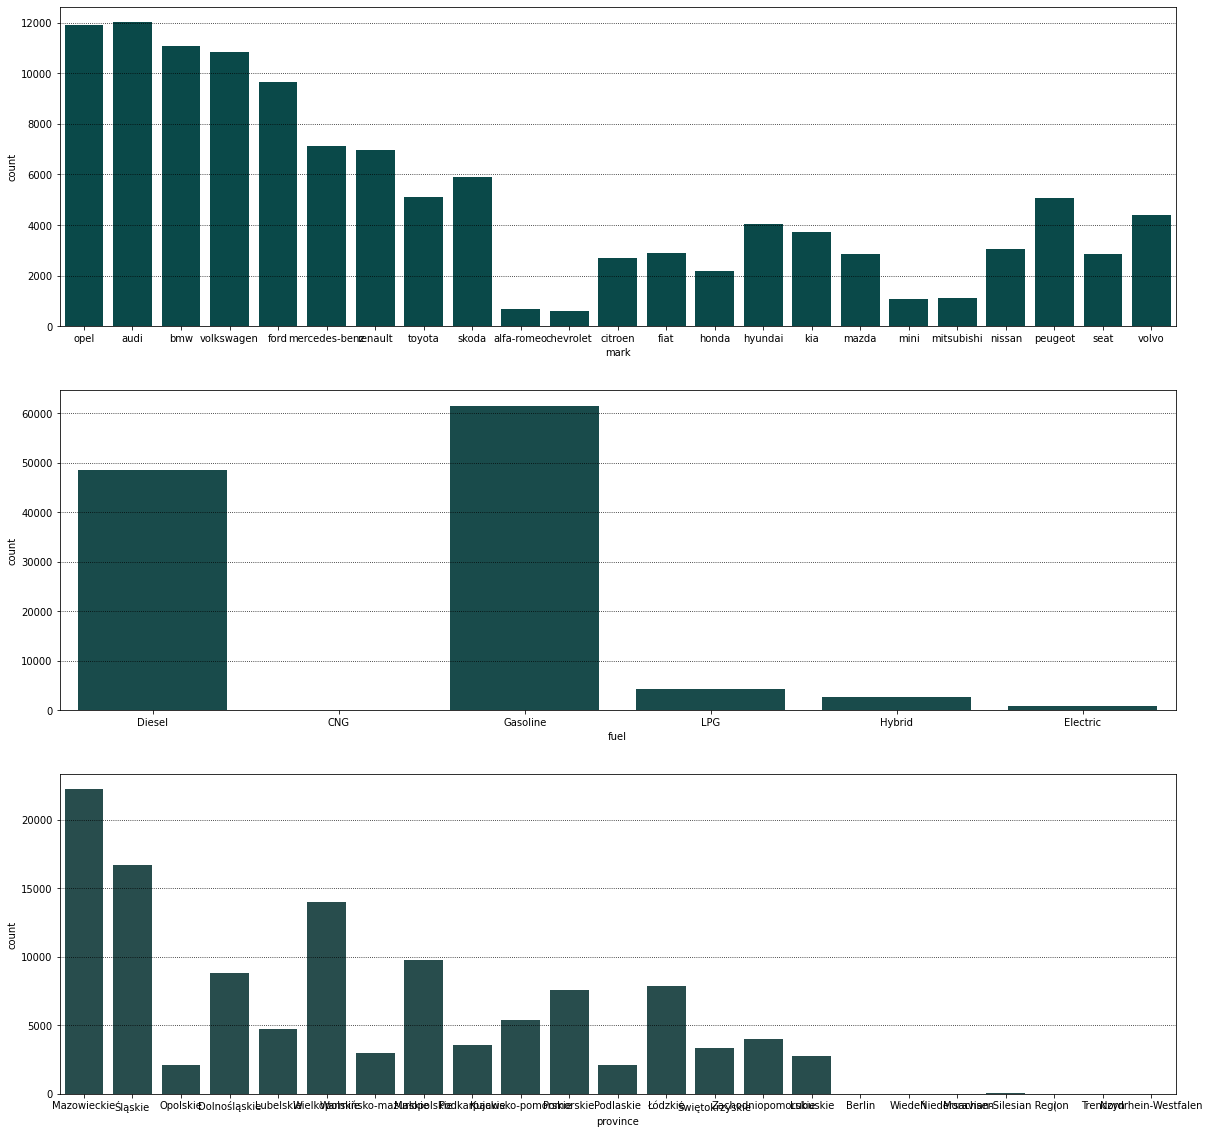

In [12]:
fig = plt.figure(figsize=(20,20))

gr = fig.add_gridspec(3,1)

ax0 = fig.add_subplot(gr[0,0])
ax1 = fig.add_subplot(gr[1,0])
ax2 = fig.add_subplot(gr[2,0])

axxes = [ax0,ax1,ax2]

for i in range(0,len(n_cat)):
    axxes[i].grid(color='#000000', linestyle=':', axis='y')
    sns.countplot(ax=axxes[i],data=df,x=df[n_cat[i]],palette=["#"+str(i)+str(i)+"5353"]) #so that the figures change colors in each cycle
#NOT: if str(i) is greater than 9 it will throw an error, be careful 

# Now we will learn to discrete data and drop them. 

In [13]:
for i in categorical: # All unique categorical values.
    unique, counts = np.unique(df[i], return_counts=True)
    print(i,"= ",counts)

mark =  [  704 12031 11070   608  2720  2880  9664  2176  4032  3744  2848  7136
  1088  1120  3072 11914  5056  6976  2848  5888  5120 10848  4384]
model =  [  32  192  224  448  160  512  480  640  608  224  960  160  256  256
  512  384  160  160  800   32  928   32  640  128   32 2175 2912  160
  736 2496   64  192  352  352   96   84  128   32  192  160   32   96
   10  160  224  160  288 3331  288  128  864  832  192  320  384   96
   64  288  256  224 1472  512   96  192  128  192  352  480  672   96
  320   64   96   64  512   96   96   96 1056   64  192  832   64  320
 1280  160  288  128  160  224  320  192  768  128 1549  256  576   32
  224  256  224   96  352   32   32  128   96   96   64 1344   64   96
  192  128   96   64   32   96  288   96   32   64   32 1312 1088   32
 2144  128   64  160   18  192   32  224  192  192   64  224   32  320
  288   64   64 2592  384   96  160   96  256  256  128   96  128  384
  160 1120  320  768   32 1664  192  800  320  192  480  192 

we will delete some outlier data in "fuel" and "province".

initial value of fuel ie 47

We delete the values in 0,1,8,9,10,16 for the province.

In [14]:
unique, counts = np.unique(df["fuel"], return_counts=True)
print(unique, counts)
df.drop(df[df["fuel"] == unique[0]].index,axis = 0,inplace = True)
unique, counts = np.unique(df["fuel"], return_counts=True)
print(unique,counts)

['CNG' 'Diesel' 'Electric' 'Gasoline' 'Hybrid' 'LPG'] [   47 48476   885 61597  2621  4301]
['Diesel' 'Electric' 'Gasoline' 'Hybrid' 'LPG'] [48476   885 61597  2621  4301]


In [15]:
unique, counts = np.unique(df["province"], return_counts=True)
print(unique, counts)
liste = [0,1,8,9,10,16]
for i in liste:
    df.drop(df[df["province"] == unique[i]].index,axis = 0,inplace = True)
unique, counts = np.unique(df["province"], return_counts=True)
print(unique,counts)

['(' 'Berlin' 'Dolnośląskie' 'Kujawsko-pomorskie' 'Lubelskie' 'Lubuskie'
 'Mazowieckie' 'Małopolskie' 'Moravian-Silesian Region' 'Niedersachsen'
 'Nordrhein-Westfalen' 'Opolskie' 'Podkarpackie' 'Podlaskie' 'Pomorskie'
 'Warmińsko-mazurskie' 'Wiedeń' 'Wielkopolskie' 'Zachodniopomorskie'
 'Łódzkie' 'Śląskie' 'Świętokrzyskie'] [    1     3  8838  5371  4739  2742 22208  9751    35     1     1  2073
  3550  2121  7602  2955     2 14010  3962  7883 16696  3336]
['Dolnośląskie' 'Kujawsko-pomorskie' 'Lubelskie' 'Lubuskie' 'Mazowieckie'
 'Małopolskie' 'Opolskie' 'Podkarpackie' 'Podlaskie' 'Pomorskie'
 'Warmińsko-mazurskie' 'Wielkopolskie' 'Zachodniopomorskie' 'Łódzkie'
 'Śląskie' 'Świętokrzyskie'] [ 8838  5371  4739  2742 22208  9751  2073  3550  2121  7602  2955 14010
  3962  7883 16696  3336]


In [16]:
_ = [print(i,"= ",len(df[i].unique())) for i in categorical]

mark =  23
model =  328
fuel =  5
city =  4419
province =  16


In [17]:
unique, counts = np.unique(df["mark"], return_counts=True)
counts

array([  704, 12024, 11070,   608,  2720,  2871,  9663,  2176,  4032,
        3744,  2848,  7130,  1087,  1120,  3072, 11900,  5056,  6976,
        2844,  5873,  5119, 10816,  4384])

In [18]:
unique, counts = np.unique(df["province"], return_counts=True)
counts

array([ 8838,  5371,  4739,  2742, 22208,  9751,  2073,  3550,  2121,
        7602,  2955, 14010,  3962,  7883, 16696,  3336])

In [19]:
unique, counts = np.unique(df["fuel"], return_counts=True)
counts

array([48443,   885, 61587,  2621,  4301])

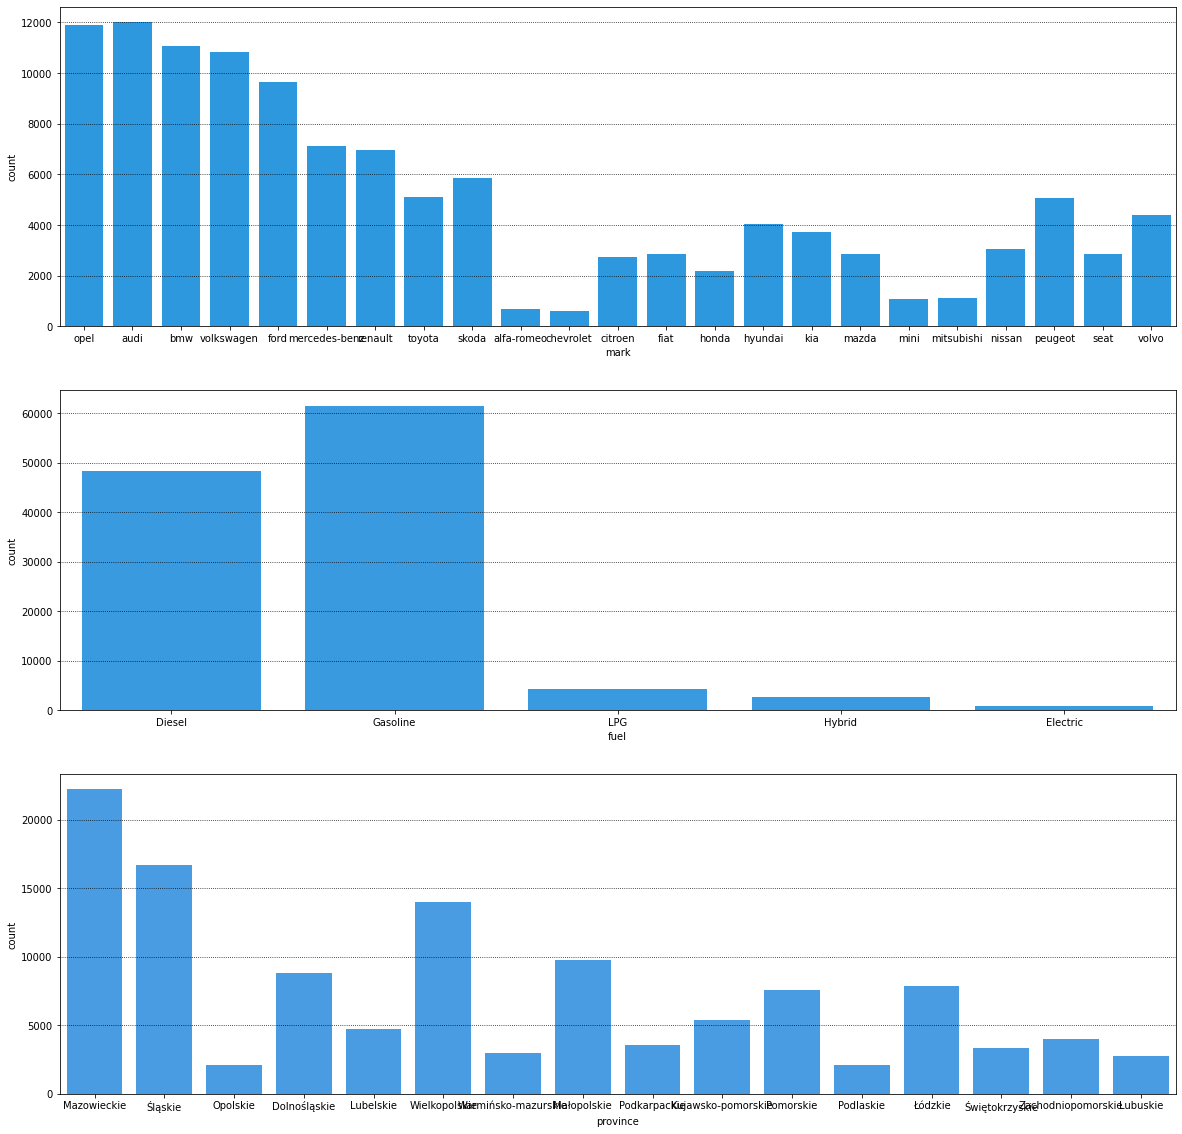

In [20]:
fig = plt.figure(figsize=(20,20))

gr = fig.add_gridspec(3,1)

ax0 = fig.add_subplot(gr[0,0])
ax1 = fig.add_subplot(gr[1,0])
ax2 = fig.add_subplot(gr[2,0])

axxes = [ax0,ax1,ax2]

for i in range(0,len(n_cat)):
    axxes[i].grid(color='#000000', linestyle=':', axis='y')
    sns.countplot(ax=axxes[i],data=df,x=df[n_cat[i]],palette=["#"+str(i)+"f9ffb"]) #so that the figures change colors in each cycle
#NOT: if str(i) is greater than 9 it will throw an error, be careful 

# **Data Processing and Modelling**

In [21]:
df = pd.get_dummies(df) # One-hot encoding

In [22]:
df.shape

(117837, 4795)

In [23]:
df.columns

Index(['year', 'mileage', 'vol_engine', 'price', 'mark_alfa-romeo',
       'mark_audi', 'mark_bmw', 'mark_chevrolet', 'mark_citroen', 'mark_fiat',
       ...
       'province_Opolskie', 'province_Podkarpackie', 'province_Podlaskie',
       'province_Pomorskie', 'province_Warmińsko-mazurskie',
       'province_Wielkopolskie', 'province_Zachodniopomorskie',
       'province_Łódzkie', 'province_Śląskie', 'province_Świętokrzyskie'],
      dtype='object', length=4795)

In [24]:
y = pd.DataFrame(df.price) # Target
x = df.drop(columns=["price"]) # data needed for regression

In [25]:
import gc # We get rid of unnecessary variables. We do this for RAM.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.15, random_state = 53)

del df,x,y
gc.collect()

0

In [26]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape # Looking shape

((100161, 4794), (17676, 4794), (100161, 1), (17676, 1))

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error # to calculate error

In [28]:
acc_df = pd.DataFrame(columns=["Name", "MAE", "MSE", "RMSE", "R2"]) # to evaluate the models together

In [29]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=5).fit(x_train, y_train)
y_pred_DT = pd.DataFrame(model.predict(x_test))

mae =  mean_absolute_error(y_test , y_pred_DT)
mse = mean_squared_error(y_test, y_pred_DT)
rmse = np.sqrt(mse)
r2 = model.score(x_test,y_test)

print("The test MAE error is=", mae)
print("The test MSE error is=", mse)
print("The test RMSE error is=",rmse)
print("The test r2_score is=",r2)

a_series = pd.Series(["DecisionTreeRegressor", int(mae), int(mse), int(rmse), r2], index = acc_df.columns)
acc_df = acc_df.append(a_series, ignore_index=True)

The test MAE error is= 19578.13285728819
The test MSE error is= 1312872655.3681536
The test RMSE error is= 36233.584633157036
The test r2_score is= 0.8107749576389363


In [30]:
from sklearn import linear_model

model = linear_model.Lasso(alpha=0.2).fit(x_train, y_train)
y_pred_las = pd.DataFrame(model.predict(x_test))

mae =  mean_absolute_error(y_test , y_pred_las)
mse = mean_squared_error(y_test, y_pred_las)
rmse = np.sqrt(mse)
r2 = model.score(x_test,y_test)

print("The test MAE error is=", mae)
print("The test MSE error is=", mse)
print("The test RMSE error is=",rmse)
print("The test r2_score error is=",r2)

a_series = pd.Series(["LassoRegressor",int(mae), int(mse), int(rmse), r2], index = acc_df.columns)
acc_df = acc_df.append(a_series, ignore_index=True)

The test MAE error is= 23845.498029414823
The test MSE error is= 1609944122.4670467
The test RMSE error is= 40124.108992811874
The test r2_score error is= 0.7679578872123394


In [31]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(max_depth=9, random_state=53).fit(x_train, y_train)
y_pred_RF = pd.DataFrame(model.predict(x_test))

mae =  mean_absolute_error(y_test , y_pred_RF)
mse = mean_squared_error(y_test, y_pred_RF)
rmse = np.sqrt(mse)
r2 = model.score(x_test,y_test)

print("The test MAE error is=", mae)
print("The test MSE error is=", mse)
print("The test RMSE error is=",rmse)
print("The test r2_score error is=",r2)

a_series = pd.Series(["RandomForestRegressor", int(mae), int(mse), int(rmse), r2], index = acc_df.columns)
acc_df = acc_df.append(a_series, ignore_index=True)

The test MAE error is= 14008.474983637652
The test MSE error is= 703846207.6788275
The test RMSE error is= 26530.100031451588
The test r2_score error is= 0.8985542673014599


In [32]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=1.0).fit(x_train, y_train)
y_pred_rid = pd.DataFrame(model.predict(x_test))

mae =  mean_absolute_error(y_test , y_pred_rid)
mse = mean_squared_error(y_test, y_pred_rid)
rmse = np.sqrt(mse)
r2 = model.score(x_test,y_test)

print("The test MAE error is=", mae)
print("The test MSE error is=", mse)
print("The test RMSE error is=",rmse)
print("The test r2_score error is=",r2)

a_series = pd.Series(["Ridge", int(mae), int(mse), int(rmse), r2], index = acc_df.columns)
acc_df = acc_df.append(a_series, ignore_index=True)

The test MAE error is= 23856.989630334374
The test MSE error is= 1605779200.3443563
The test RMSE error is= 40072.17488912171
The test r2_score error is= 0.7685581796793004


In [33]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=5).fit(x_train, y_train)
y_pred_KNN = pd.DataFrame(model.predict(x_test))

mae =  mean_absolute_error(y_test , y_pred_KNN)
mse = mean_squared_error(y_test, y_pred_KNN)
rmse = np.sqrt(mse)
r2 = model.score(x_test,y_test)

print("The test MAE error is=", mae)
print("The test MSE error is=", mse)
print("The test RMSE error is=",rmse)
print("The test r2_score error is=",r2)

a_series = pd.Series(["KNeighborsRegressor", int(mae), int(mse), int(rmse), r2], index = acc_df.columns)
acc_df = acc_df.append(a_series, ignore_index=True)

The test MAE error is= 28181.68365014709
The test MSE error is= 2709002365.1766896
The test RMSE error is= 52048.07743977379
The test r2_score error is= 0.6095500312153006


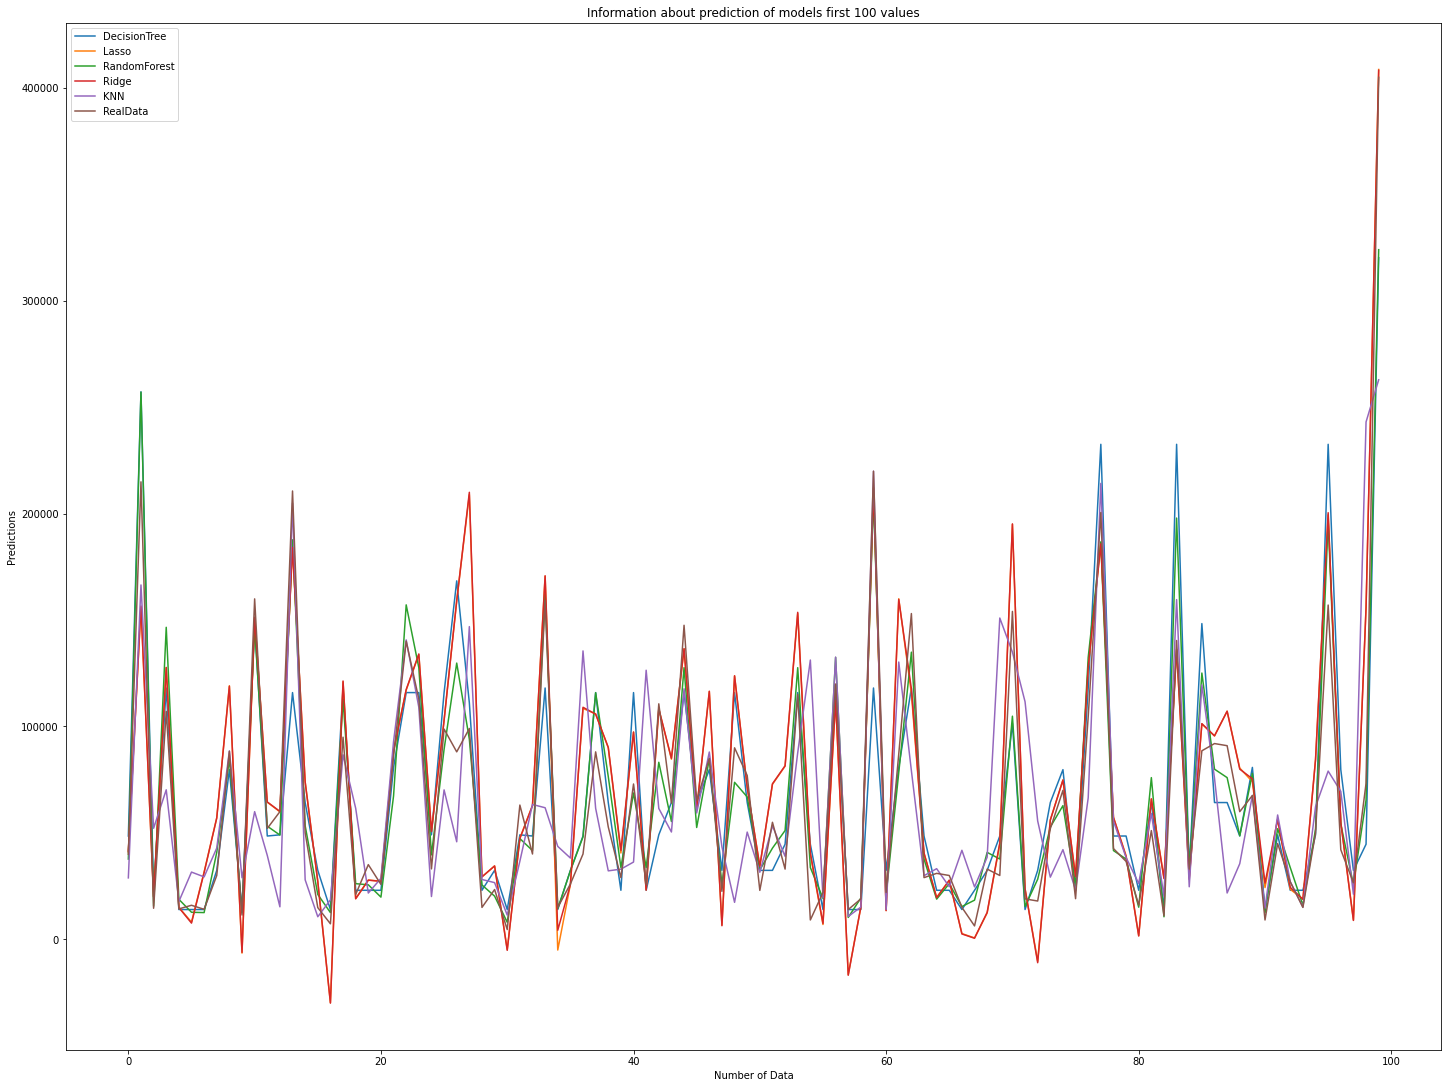

In [34]:
plt.figure(figsize=(20, 15), layout='constrained')
plt.plot(np.arange(0,100), y_pred_DT.to_numpy()[0:100], label='DecisionTree')  # Plot some data on the (implicit) axes.
plt.plot(np.arange(0,100), y_pred_las.to_numpy()[0:100], label='Lasso')
plt.plot(np.arange(0,100), y_pred_RF.to_numpy()[0:100], label='RandomForest') 
plt.plot(np.arange(0,100), y_pred_rid.to_numpy()[0:100], label='Ridge') 
plt.plot(np.arange(0,100), y_pred_KNN.to_numpy()[0:100], label='KNN') 
plt.plot(np.arange(0,100), y_test.to_numpy()[0:100], label='RealData') 
plt.xlabel('Number of Data')
plt.ylabel('Predictions')
plt.title("Information about prediction of models first 100 values")
plt.legend();

In [35]:
acc_df

,Name,MAE,MSE,RMSE,R2
0,DecisionTreeRegressor,19578,1312872655,36233,0.810775
1,LassoRegressor,23845,1609944122,40124,0.767958
2,RandomForestRegressor,14008,703846207,26530,0.898554
3,Ridge,23856,1605779200,40072,0.768558
4,KNeighborsRegressor,28181,2709002365,52048,0.609550


# **Conclusion**

As we can see random forest is gooder than them. If there is a place I missed or something you do not understand, please let me know. If you have different thoughts, share with me.

# **I tried to explain as best I could. If you've come this far and liked this review, don't forget to hit the arrow in the upper right corner. Hope to see you in different reviews.**